In [ ]:
#deneme

In [ ]:
# rdflib kütüphanesini içe aktar
from rdflib import Graph

In [ ]:
# Gerekli kütüphaneleri yükle
#!pip install rdflib


In [ ]:
# RDF verisini Turtle formatında tanımla
rdf_data = """
@prefix ex: <http://example.org/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

# Classes
ex:Event a rdfs:Class .
ex:Location a rdfs:Class .
ex:Time a rdfs:Class .
ex:Participant a rdfs:Class .
ex:Organizer a rdfs:Class .
ex:EventType a rdfs:Class .
ex:City a rdfs:Class .
ex:Venue a rdfs:Class .
ex:Role a rdfs:Class .
ex:OrganizationType a rdfs:Class .

# Properties
ex:hasLocation a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Location .

ex:hasTime a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Time .

ex:hasParticipant a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Participant .

ex:hasOrganizer a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Organizer .

ex:hasEventType a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:EventType .

ex:hasCity a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:City .

ex:hasVenue a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:Venue .

ex:hasRole a rdf:Property ;
    rdfs:domain ex:Participant ;
    rdfs:range ex:Role .

ex:hasOrganizationType a rdf:Property ;
    rdfs:domain ex:Organizer ;
    rdfs:range ex:OrganizationType .

# Instances
ex:AI_Conference a ex:Event ;
    ex:hasLocation ex:Tech_Center ;
    ex:hasTime "2024-12-01 to 2024-12-03"^^xsd:string ;
    ex:hasParticipant ex:John_Doe, ex:Jane_Smith ;
    ex:hasOrganizer ex:Tech_Events_Inc. .

ex:Blockchain_Summit a ex:Event ;
    ex:hasLocation ex:Innovation_Hub ;
    ex:hasTime "2025-01-10 to 2025-01-12"^^xsd:string ;
    ex:hasParticipant ex:John_Doe, ex:Alice_Brown ;
    ex:hasOrganizer ex:Tech_Events_Inc. .

ex:Music_Festival a ex:Event ;
    ex:hasLocation ex:Concert_Hall ;
    ex:hasTime "2025-02-15 to 2025-02-16"^^xsd:string ;
    ex:hasParticipant ex:Alice_Brown ;
    ex:hasOrganizer ex:Music_Mania_Org .

ex:Tech_Center a ex:Location ;
    ex:hasCity ex:New_York .

ex:Concert_Hall a ex:Location ;
    ex:hasCity ex:Los_Angeles .

ex:Innovation_Hub a ex:Location ;
    ex:hasCity ex:San_Francisco .

ex:John_Doe a ex:Participant .
ex:Jane_Smith a ex:Participant .
ex:Alice_Brown a ex:Participant .

ex:Tech_Events_Inc a ex:Organizer .
ex:Music_Mania_Org a ex:Organizer .
"""

In [ ]:
# RDF verisini dosyaya kaydet
g = Graph()
with open("ontology.ttl", "w") as f:
    f.write(rdf_data)

# Dosyayı parse et
try:
    g.parse("ontology.ttl", format="turtle")
    print("RDF dosyasından başarıyla yüklendi!")
except Exception as e:
    print(f"Hata: {e}")


Hata: at line 61 of <>:
Bad syntax (expected directive or statement) at ^ in:
"...b'oe, ex:Jane_Smith ;\n    ex:hasOrganizer ex:Tech_Events_Inc. '^b'.\n\nex:Blockchain_Summit a ex:Event ;\n    ex:hasLocation ex:I'..."


In [ ]:
# Grafikteki üçlüleri yazdır
print("RDF Grafiğindeki Triples:")
for subj, pred, obj in g:
    print(f"{subj} -- {pred} --> {obj}")


RDF Grafiğindeki Triples:
http://example.org/Role -- http://www.w3.org/1999/02/22-rdf-syntax-ns#type --> http://www.w3.org/2000/01/rdf-schema#Class
http://example.org/hasTime -- http://www.w3.org/2000/01/rdf-schema#domain --> http://example.org/Event
http://example.org/Location -- http://www.w3.org/1999/02/22-rdf-syntax-ns#type --> http://www.w3.org/2000/01/rdf-schema#Class
http://example.org/hasEventType -- http://www.w3.org/2000/01/rdf-schema#domain --> http://example.org/Event
http://example.org/hasRole -- http://www.w3.org/2000/01/rdf-schema#domain --> http://example.org/Participant
http://example.org/Venue -- http://www.w3.org/1999/02/22-rdf-syntax-ns#type --> http://www.w3.org/2000/01/rdf-schema#Class
http://example.org/hasOrganizer -- http://www.w3.org/1999/02/22-rdf-syntax-ns#type --> http://www.w3.org/1999/02/22-rdf-syntax-ns#Property
http://example.org/hasEventType -- http://www.w3.org/2000/01/rdf-schema#range --> http://example.org/EventType
http://example.org/AI_Conference 

In [ ]:
# SPARQL sorgusu yap
query = """
PREFIX ex: <http://example.org/>
SELECT ?event ?location WHERE {
    ?event ex:hasLocation ?location .
}
"""
print("\nSPARQL Sorgu Sonuçları:")
for row in g.query(query):
    print(f"Event: {row.event}, Location: {row.location}")



SPARQL Sorgu Sonuçları:
Event: http://example.org/AI_Conference, Location: http://example.org/Tech_Center


In [ ]:
!pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph

In [ ]:
# NetworkX grafiği oluştur
G = nx.DiGraph()

In [ ]:
# RDF üçlülerini ekle
for subj, pred, obj in g:
    G.add_edge(subj.n3(), obj.n3(), label=pred.n3())

In [ ]:
# Grafik düzeni oluştur
pos = nx.spring_layout(G)

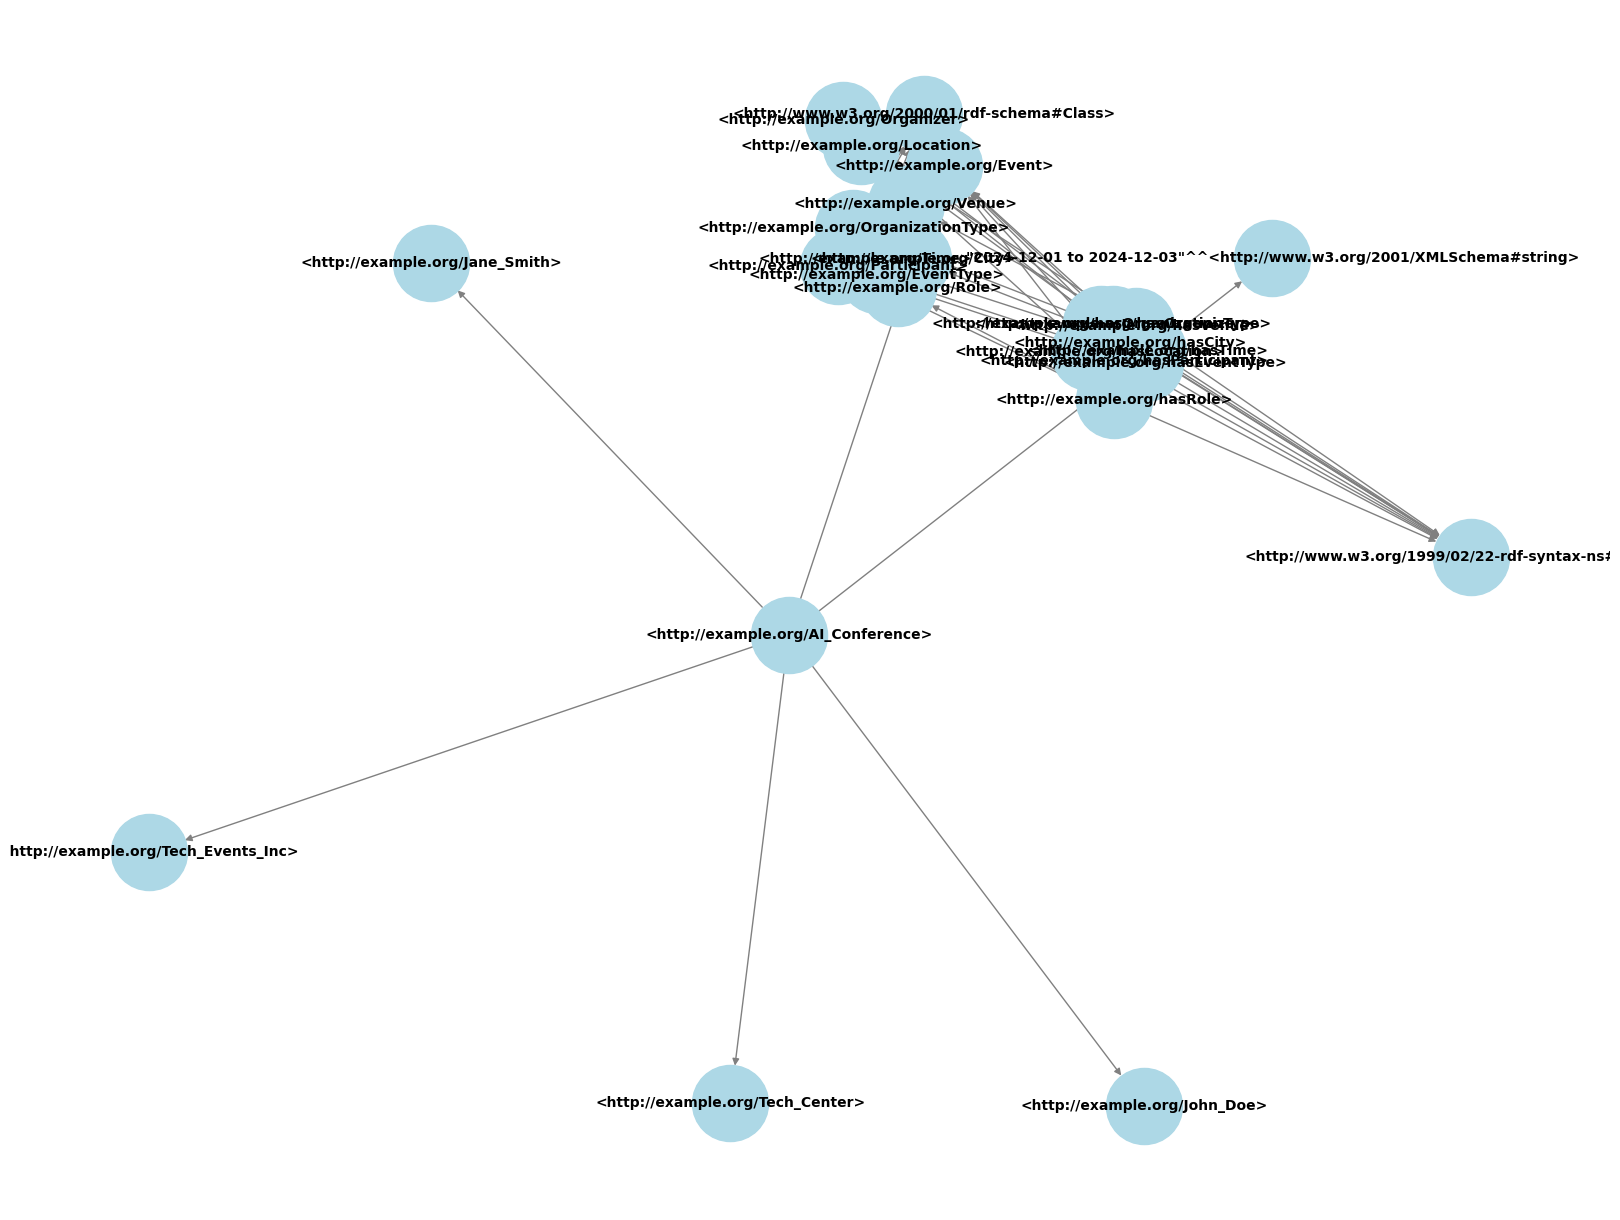

In [ ]:
# Grafiği çiz
plt.figure(figsize=(16, 12))
nx.draw(
    G, pos, with_labels=True, node_size=3000, node_color="lightblue",
    font_size=10, font_weight="bold", edge_color="gray"
)


{('<http://example.org/Role>',
  '<http://www.w3.org/2000/01/rdf-schema#Class>'): Text(-0.043419959278789805, 0.24558901541866976, '<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>'),
 ('<http://example.org/hasTime>',
  '<http://example.org/Event>'): Text(0.0873899151461052, 0.16660723708050143, '<http://www.w3.org/2000/01/rdf-schema#domain>'),
 ('<http://example.org/hasTime>',
  '<http://www.w3.org/1999/02/22-rdf-syntax-ns#Property>'): Text(0.34218797045940397, -0.10265026260862299, '<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>'),
 ('<http://example.org/hasTime>',
  '<http://example.org/Time>'): Text(0.048839489711983514, 0.1023718712909063, '<http://www.w3.org/2000/01/rdf-schema#range>'),
 ('<http://example.org/Event>',
  '<http://www.w3.org/2000/01/rdf-schema#Class>'): Text(-0.020850504900901456, 0.329612152076564, '<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>'),
 ('<http://example.org/Location>',
  '<http://www.w3.org/2000/01/rdf-schema#Class>'): Text(-0.0609668155545676

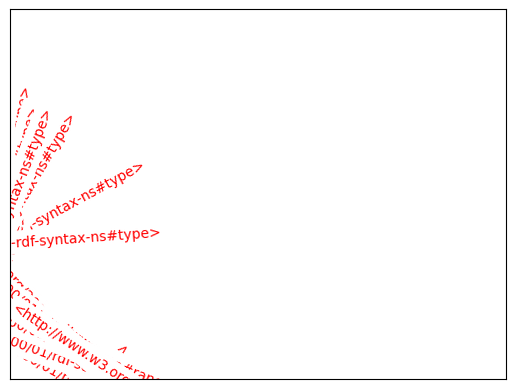

In [ ]:
# Kenar etiketlerini çiz
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

RDF verisi yüklenirken hata oluştu: at line 61 of <>:
Bad syntax (expected directive or statement) at ^ in:
"...b'oe, ex:Jane_Smith ;\n    ex:hasOrganizer ex:Tech_Events_Inc. '^b'.\n\nex:Blockchain_Summit a ex:Event ;\n    ex:hasLocation ex:I'..."


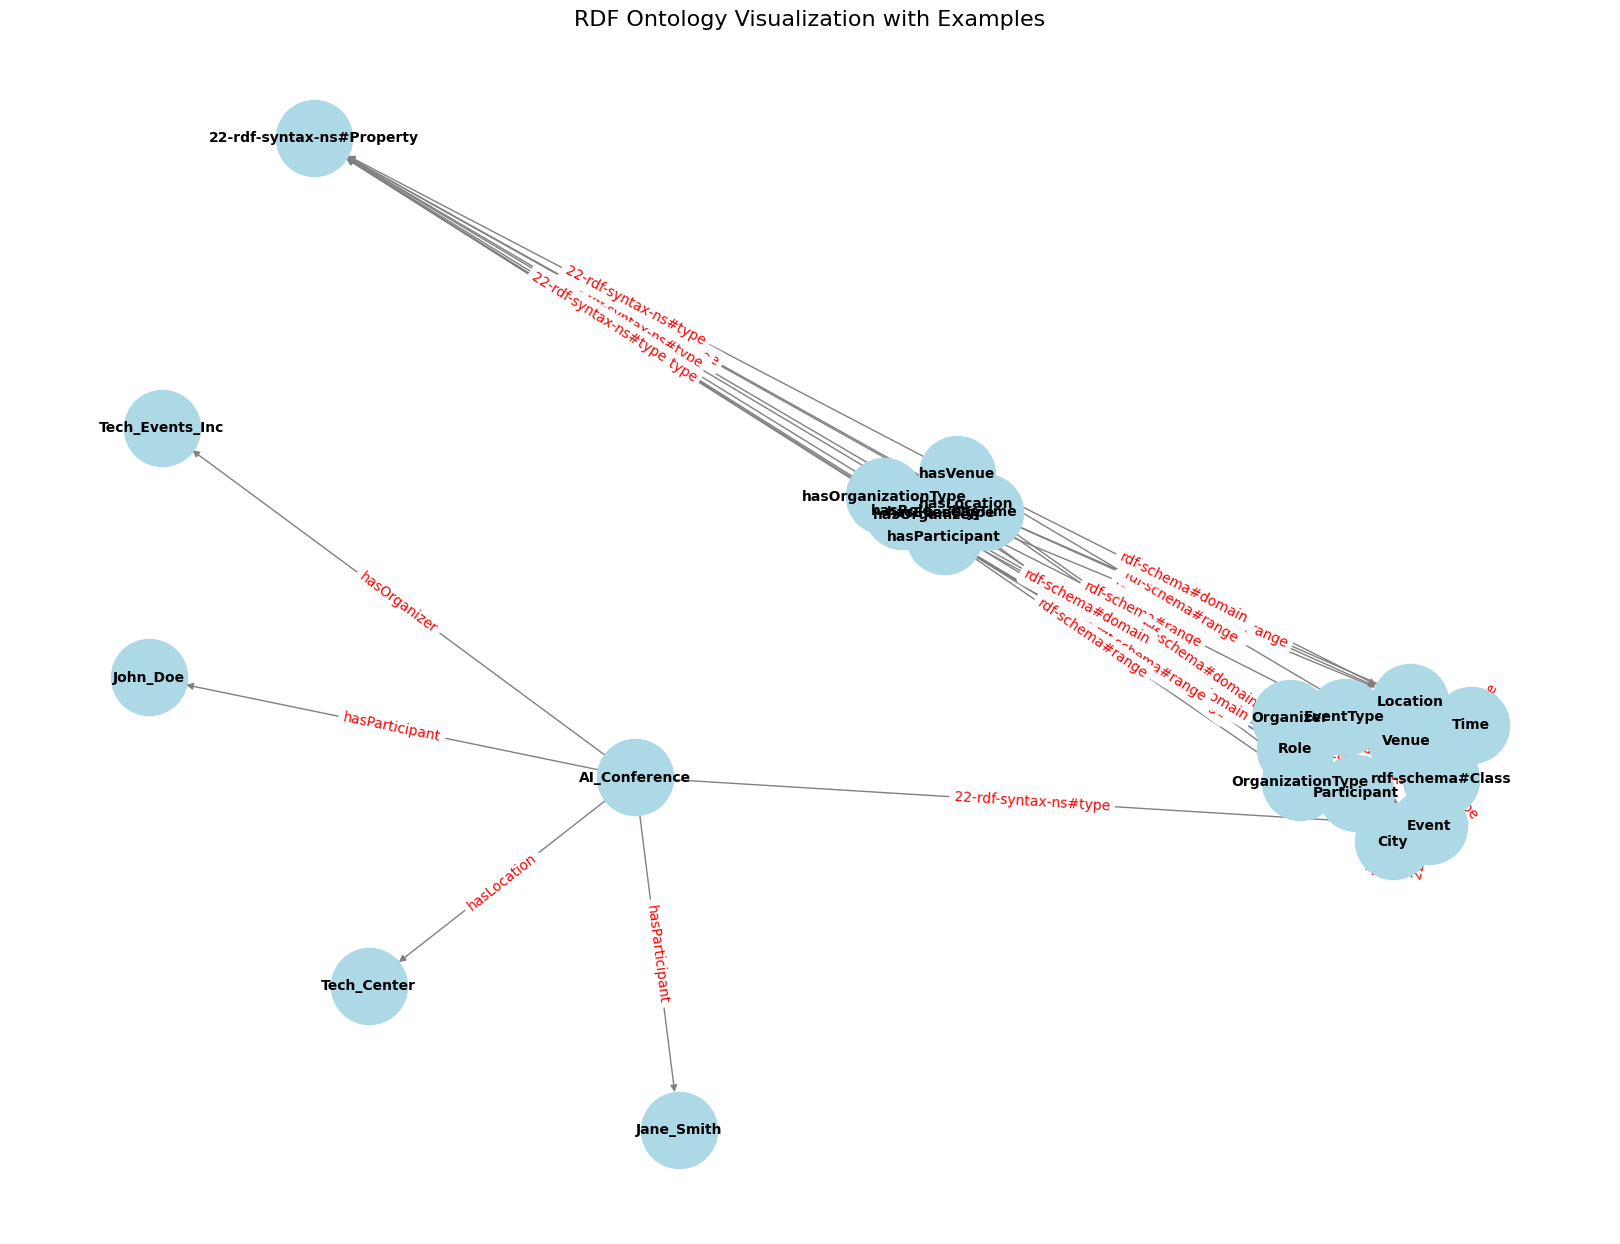

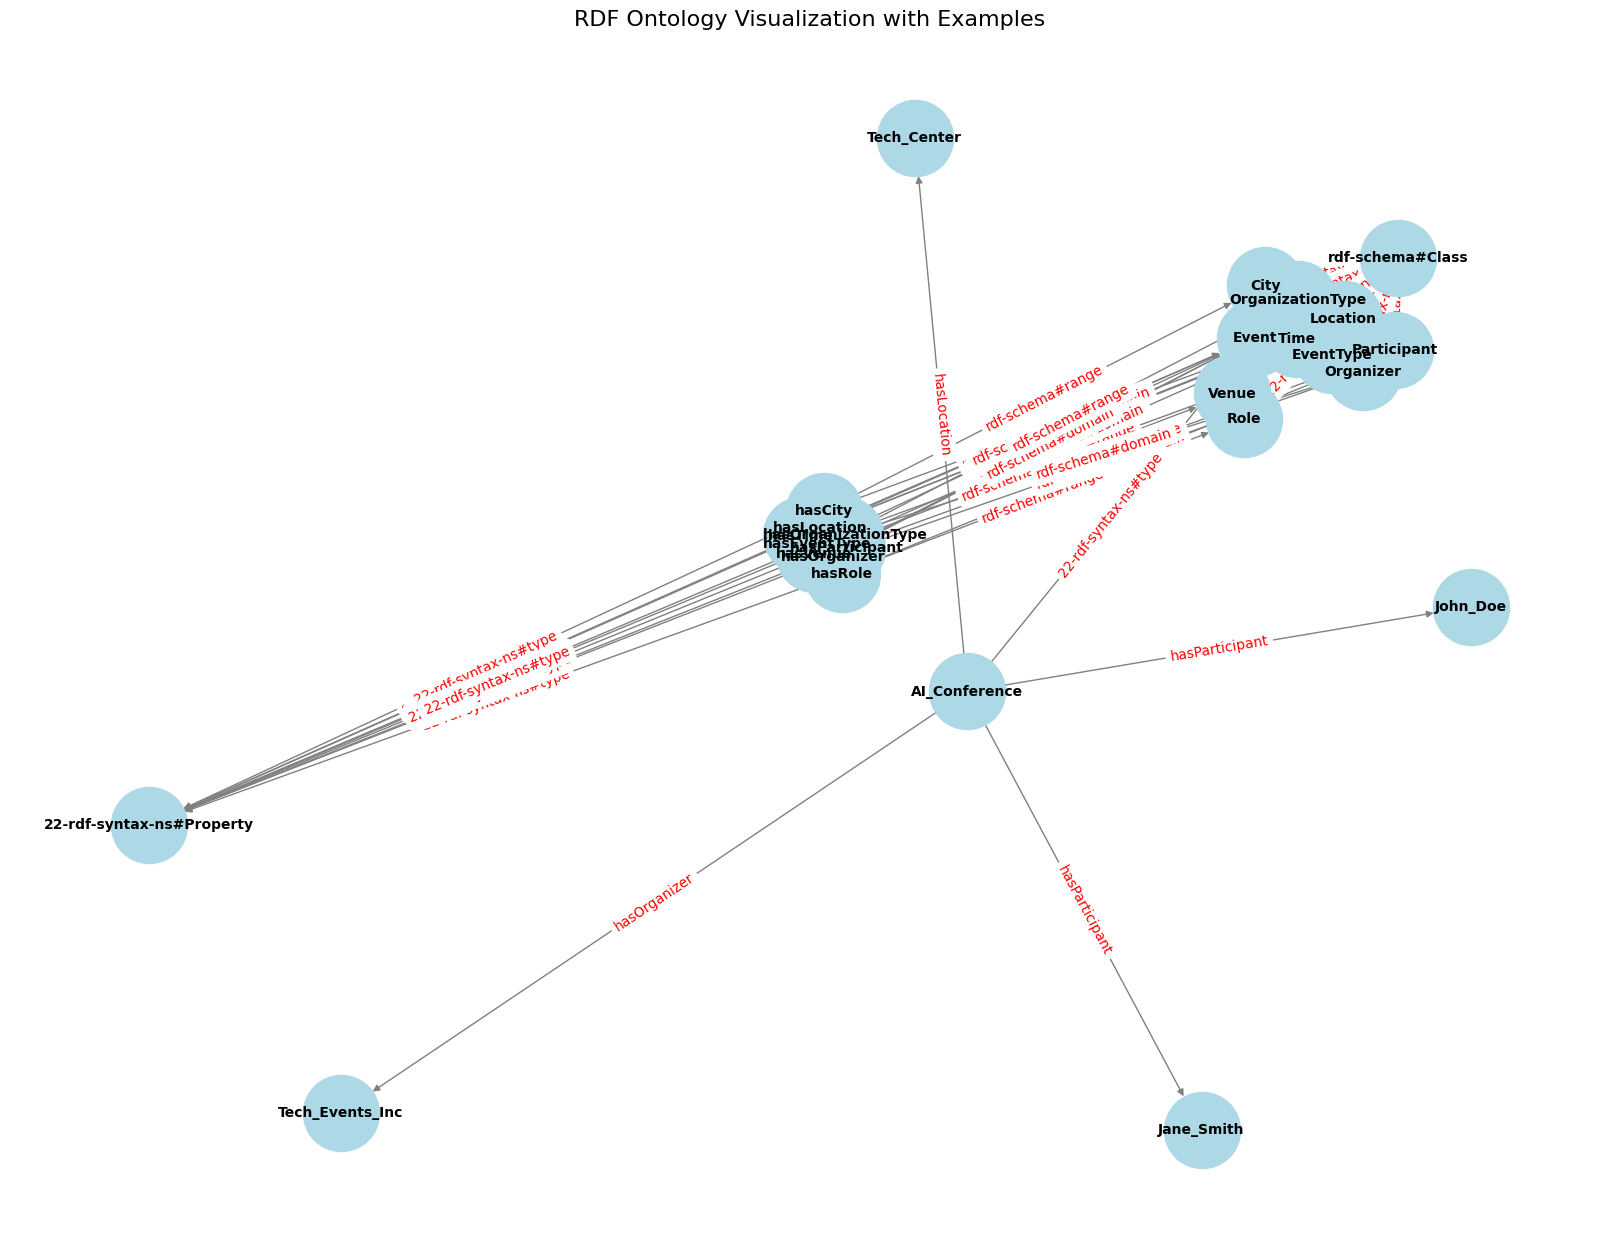

In [ ]:
# Gerekli kütüphaneleri yükle
!pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph

# RDF verisini Turtle formatında tanımla (örneklerle)
rdf_data = """
@prefix ex: <http://example.org/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

# Classes
ex:Event a rdfs:Class .
ex:Location a rdfs:Class .
ex:Time a rdfs:Class .
ex:Participant a rdfs:Class .
ex:Organizer a rdfs:Class .
ex:EventType a rdfs:Class .
ex:City a rdfs:Class .
ex:Venue a rdfs:Class .
ex:Role a rdfs:Class .
ex:OrganizationType a rdfs:Class .

# Properties
ex:hasLocation a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Location .

ex:hasTime a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Time .

ex:hasParticipant a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Participant .

ex:hasOrganizer a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Organizer .

ex:hasEventType a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:EventType .

ex:hasCity a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:City .

ex:hasVenue a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:Venue .

ex:hasRole a rdf:Property ;
    rdfs:domain ex:Participant ;
    rdfs:range ex:Role .

ex:hasOrganizationType a rdf:Property ;
    rdfs:domain ex:Organizer ;
    rdfs:range ex:OrganizationType .

# Instances
ex:AI_Conference a ex:Event ;
    ex:hasLocation ex:Tech_Center ;
    ex:hasTime "2024-12-01 to 2024-12-03"^^xsd:string ;
    ex:hasParticipant ex:John_Doe, ex:Jane_Smith ;
    ex:hasOrganizer ex:Tech_Events_Inc. .

ex:Blockchain_Summit a ex:Event ;
    ex:hasLocation ex:Innovation_Hub ;
    ex:hasTime "2025-01-10 to 2025-01-12"^^xsd:string ;
    ex:hasParticipant ex:John_Doe, ex:Alice_Brown ;
    ex:hasOrganizer ex:Tech_Events_Inc. .

ex:Music_Festival a ex:Event ;
    ex:hasLocation ex:Concert_Hall ;
    ex:hasTime "2025-02-15 to 2025-02-16"^^xsd:string ;
    ex:hasParticipant ex:Alice_Brown ;
    ex:hasOrganizer ex:Music_Mania_Org .

ex:Tech_Center a ex:Location ;
    ex:hasCity ex:New_York .

ex:Concert_Hall a ex:Location ;
    ex:hasCity ex:Los_Angeles .

ex:Innovation_Hub a ex:Location ;
    ex:hasCity ex:San_Francisco .

ex:John_Doe a ex:Participant .
ex:Jane_Smith a ex:Participant .
ex:Alice_Brown a ex:Participant .

ex:Tech_Events_Inc a ex:Organizer .
ex:Music_Mania_Org a ex:Organizer .
"""

# RDF grafiği oluştur ve veriyi yükle
g = Graph()
# Gerekli kütüphaneleri yükle
!pip install rdflib networkx matplotlib

import rdflib
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph

# RDF verisini Turtle formatında tanımla (örneklerle)
rdf_data = """
@prefix ex: <http://example.org/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

# Classes
ex:Event a rdfs:Class .
ex:Location a rdfs:Class .
ex:Time a rdfs:Class .
ex:Participant a rdfs:Class .
ex:Organizer a rdfs:Class .
ex:EventType a rdfs:Class .
ex:City a rdfs:Class .
ex:Venue a rdfs:Class .
ex:Role a rdfs:Class .
ex:OrganizationType a rdfs:Class .

# Properties
ex:hasLocation a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Location .

ex:hasTime a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Time .

ex:hasParticipant a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Participant .

ex:hasOrganizer a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Organizer .

ex:hasEventType a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:EventType .

ex:hasCity a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:City .

ex:hasVenue a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:Venue .

ex:hasRole a rdf:Property ;
    rdfs:domain ex:Participant ;
    rdfs:range ex:Role .

ex:hasOrganizationType a rdf:Property ;
    rdfs:domain ex:Organizer ;
    rdfs:range ex:OrganizationType .

# Instances
ex:AI_Conference a ex:Event ;
    ex:hasLocation ex:Tech_Center ;
    ex:hasTime "2024-12-01 to 2024-12-03"^^xsd:string ;
    ex:hasParticipant ex:John_Doe, ex:Jane_Smith ;
    ex:hasOrganizer ex:Tech_Events_Inc. .

ex:Blockchain_Summit a ex:Event ;
    ex:hasLocation ex:Innovation_Hub ;
    ex:hasTime "2025-01-10 to 2025-01-12"^^xsd:string ;
    ex:hasParticipant ex:John_Doe, ex:Alice_Brown ;
    ex:hasOrganizer ex:Tech_Events_Inc. .

ex:Music_Festival a ex:Event ;
    ex:hasLocation ex:Concert_Hall ;
    ex:hasTime "2025-02-15 to 2025-02-16"^^xsd:string ;
    ex:hasParticipant ex:Alice_Brown ;
    ex:hasOrganizer ex:Music_Mania_Org .

ex:Tech_Center a ex:Location ;
    ex:hasCity ex:New_York .

ex:Concert_Hall a ex:Location ;
    ex:hasCity ex:Los_Angeles .

ex:Innovation_Hub a ex:Location ;
    ex:hasCity ex:San_Francisco .

ex:John_Doe a ex:Participant .
ex:Jane_Smith a ex:Participant .
ex:Alice_Brown a ex:Participant .

ex:Tech_Events_Inc a ex:Organizer .
ex:Music_Mania_Org a ex:Organizer .
"""

# RDF grafiği oluştur ve veriyi yükle
g = Graph()

# RDF verisini doğru formatta işleme
try:
    g.parse(data=rdf_data, format="turtle")
    print("RDF verisi başarıyla yüklendi.")
except Exception as e:
    print(f"RDF verisi yüklenirken hata oluştu: {e}")

# NetworkX grafiği oluştur
G = nx.DiGraph()

# RDF üçlülerini ekle (örnekleri de düğüm olarak ekle)
for subj, pred, obj in g:
    # Sınıf (Class) ilişkilerinden örnekleri bağlamak
    if isinstance(subj, rdflib.term.URIRef) and isinstance(obj, rdflib.term.URIRef):
        G.add_edge(subj.split('/')[-1], obj.split('/')[-1], label=pred.split('/')[-1])

# Grafik düzeni oluştur
pos = nx.spring_layout(G)

# Grafiği çiz
plt.figure(figsize=(16, 12))
nx.draw(
    G, pos, with_labels=True, node_size=3000, node_color="lightblue",
    font_size=10, font_weight="bold", edge_color="gray"
)

# Kenar etiketlerini çiz
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

# Başlık ve göster
plt.title("RDF Ontology Visualization with Examples", fontsize=16)
plt.show()


# NetworkX grafiği oluştur
G = nx.DiGraph()

# RDF üçlülerini ekle (örnekleri de düğüm olarak ekle)
for subj, pred, obj in g:
    # Sınıf (Class) ilişkilerinden örnekleri bağlamak
    if isinstance(subj, rdflib.term.URIRef) and isinstance(obj, rdflib.term.URIRef):
        G.add_edge(subj.split('/')[-1], obj.split('/')[-1], label=pred.split('/')[-1])

# Grafik düzeni oluştur
pos = nx.spring_layout(G)

# Grafiği çiz
plt.figure(figsize=(16, 12))
nx.draw(
    G, pos, with_labels=True, node_size=3000, node_color="lightblue",
    font_size=10, font_weight="bold", edge_color="gray"
)

# Kenar etiketlerini çiz
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

# Başlık ve göster
plt.title("RDF Ontology Visualization with Examples", fontsize=16)
plt.show()


RDF verisi yüklenirken hata oluştu: at line 61 of <>:
Bad syntax (expected directive or statement) at ^ in:
"...b'n_Doe, ex:Jane_Smith ;\n    ex:hasOrganizer ex:Tech_Events_In'^b'c. .\n\nex:Blockchain_Summit a ex:Event ;\n    ex:hasLocation e'..."


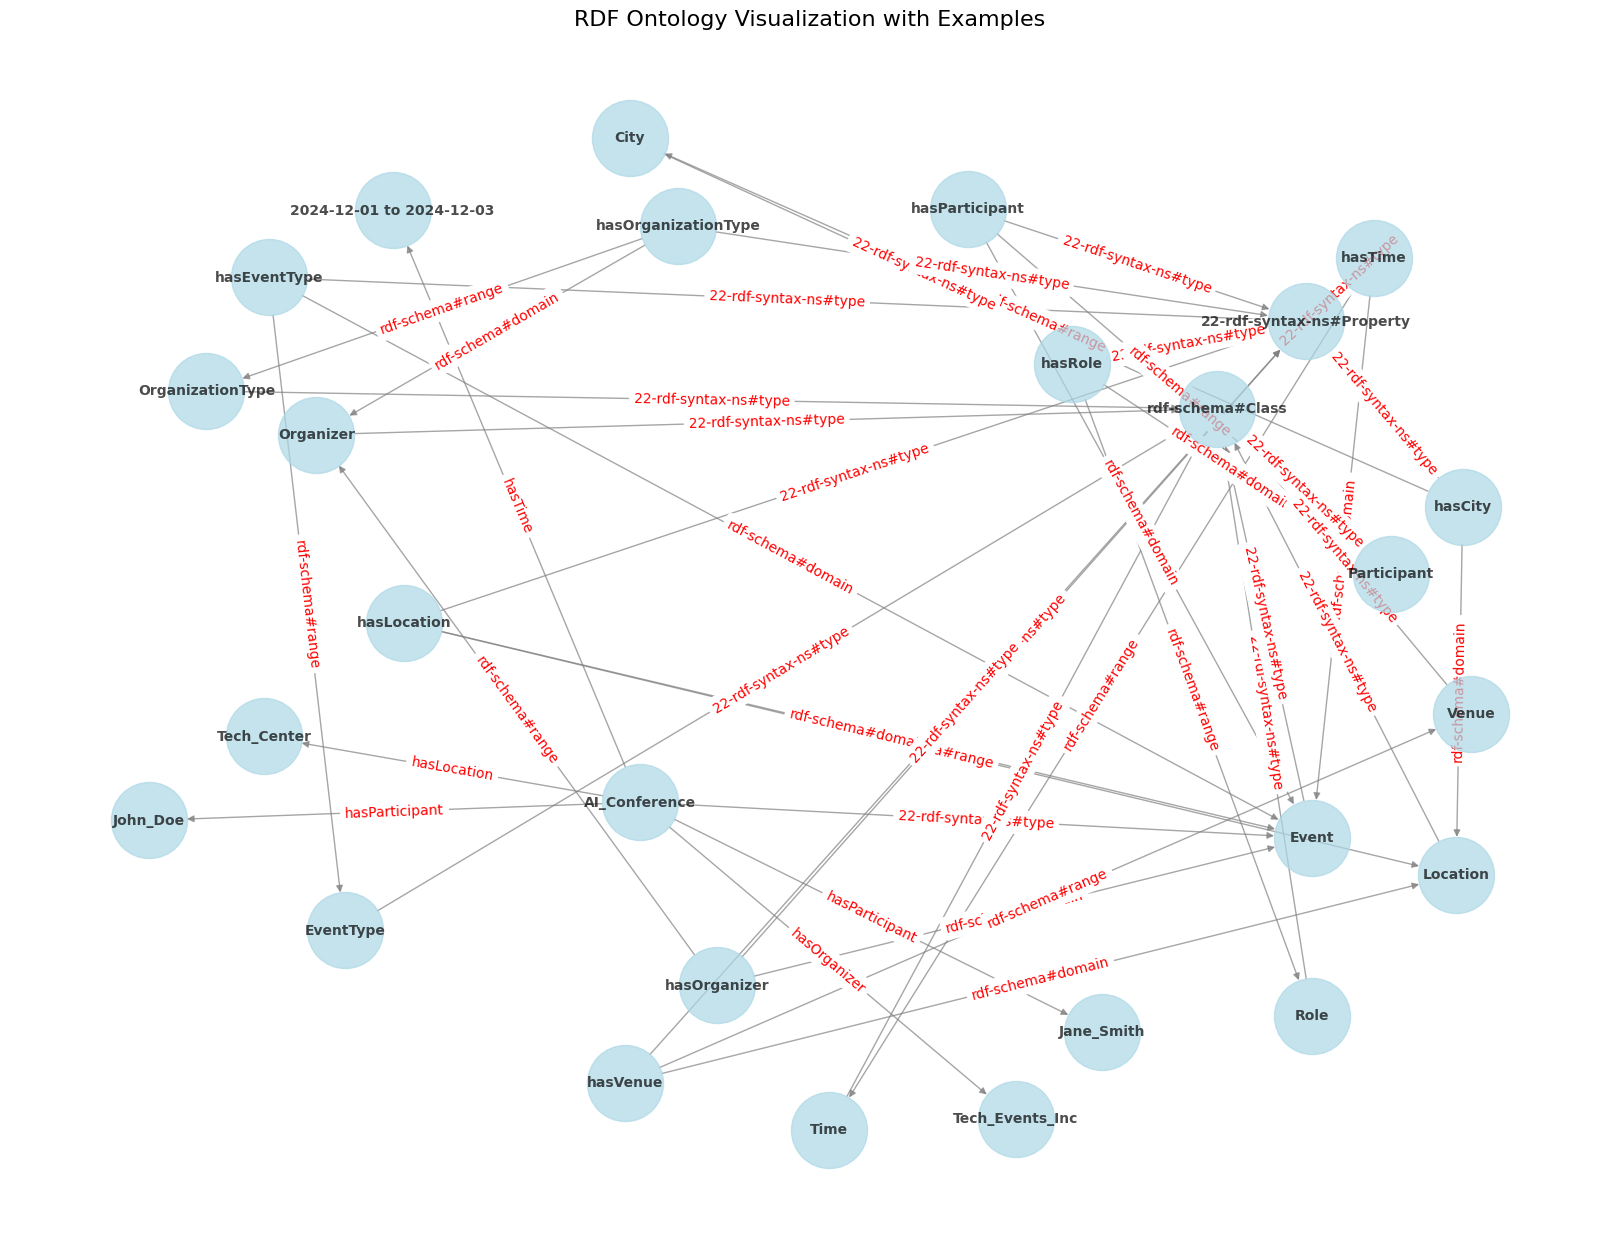

In [29]:
#SON HALİ

# Gerekli kütüphaneleri yükle
!pip install rdflib networkx matplotlib

import rdflib
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph

# RDF verisini Turtle formatında tanımla (örneklerle)
rdf_data = """
@prefix ex: <http://example.org/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

# Classes
ex:Event a rdfs:Class .
ex:Location a rdfs:Class .
ex:Time a rdfs:Class .
ex:Participant a rdfs:Class .
ex:Organizer a rdfs:Class .
ex:EventType a rdfs:Class .
ex:City a rdfs:Class .
ex:Venue a rdfs:Class .
ex:Role a rdfs:Class .
ex:OrganizationType a rdfs:Class .

# Properties (Bağlantı isimlendirmelerini daha anlamlı hale getirme)
ex:hasLocation a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Location .

ex:hasTime a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Time .

ex:hasParticipant a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Participant .

ex:hasOrganizer a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Organizer .

ex:hasEventType a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:EventType .

ex:hasCity a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:City .

ex:hasVenue a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:Venue .

ex:hasRole a rdf:Property ;
    rdfs:domain ex:Participant ;
    rdfs:range ex:Role .

ex:hasOrganizationType a rdf:Property ;
    rdfs:domain ex:Organizer ;
    rdfs:range ex:OrganizationType .

# Instances
ex:AI_Conference a ex:Event ;
    ex:hasLocation ex:Tech_Center ;
    ex:hasTime "2024-12-01 to 2024-12-03"^^xsd:string ;
    ex:hasParticipant ex:John_Doe, ex:Jane_Smith ;
    ex:hasOrganizer ex:Tech_Events_Inc. .

ex:Blockchain_Summit a ex:Event ;
    ex:hasLocation ex:Innovation_Hub ;
    ex:hasTime "2025-01-10 to 2025-01-12"^^xsd:string ;
    ex:hasParticipant ex:John_Doe, ex:Alice_Brown ;
    ex:hasOrganizer ex:Tech_Events_Inc. .

ex:Music_Festival a ex:Event ;
    ex:hasLocation ex:Concert_Hall ;
    ex:hasTime "2025-02-15 to 2025-02-16"^^xsd:string ;
    ex:hasParticipant ex:Alice_Brown ;
    ex:hasOrganizer ex:Music_Mania_Org .

ex:Tech_Center a ex:Location ;
    ex:hasCity ex:New_York .

ex:Concert_Hall a ex:Location ;
    ex:hasCity ex:Los_Angeles .

ex:Innovation_Hub a ex:Location ;
    ex:hasCity ex:San_Francisco .

ex:John_Doe a ex:Participant .
ex:Jane_Smith a ex:Participant .
ex:Alice_Brown a ex:Participant .

ex:Tech_Events_Inc a ex:Organizer .
ex:Music_Mania_Org a ex:Organizer .
"""

# RDF grafiği oluştur ve veriyi yükle
g = Graph()

# RDF verisini doğru formatta işleme
try:
    g.parse(data=rdf_data, format="turtle")
    print("RDF verisi başarıyla yüklendi.")
except Exception as e:
    print(f"RDF verisi yüklenirken hata oluştu: {e}")

# NetworkX grafiği oluştur
G = nx.DiGraph()

# RDF üçlülerini ekle (bağlantı isimlendirmelerini daha anlaşılır hale getir)
for subj, pred, obj in g:
    # URI'lerden sadece isim kısmını almak
    subj_name = subj.split('/')[-1]
    obj_name = obj.split('/')[-1]
    pred_name = pred.split('/')[-1]

    # Bağlantıları eklerken daha anlaşılır isimler kullan
    G.add_edge(subj_name, obj_name, label=pred_name)

# Grafik düzeni oluştur
pos = nx.spring_layout(G, k=1.0, iterations=20)  # k parametresi ile daha açık ve düzgün bir düzen sağlanabilir

# Grafiği çiz
plt.figure(figsize=(16, 12))
nx.draw(
    G, pos, with_labels=True, node_size=3000, node_color="lightblue",
    font_size=10, font_weight="bold", edge_color="gray", alpha=0.7
)

# Kenar etiketlerini çiz
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red", font_size=10)

# Başlık ve göster
plt.title("RDF Ontology Visualization with Examples", fontsize=16)
plt.show()


# yine yeniden tablo görselleştirme

RDF verisi yüklenirken hata oluştu: at line 61 of <>:
Bad syntax (expected directive or statement) at ^ in:
"...b'oe, ex:Jane_Smith ;\n    ex:hasOrganizer ex:Tech_Events_Inc. '^b'.\n\nex:Blockchain_Summit a ex:Event ;\n    ex:hasLocation ex:I'..."


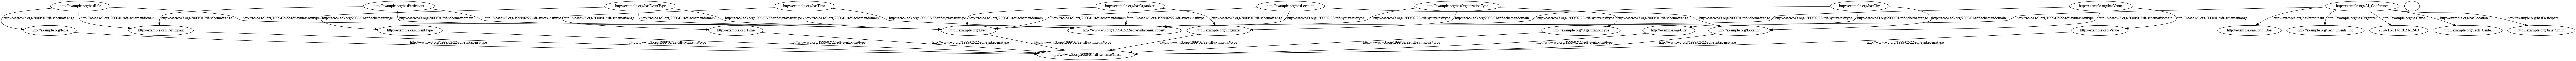

In [33]:
import io
import pydotplus
from rdflib import Graph
from IPython.display import Image, display

# Helper function for visualizing RDF graphs
def visualize(g):
    # RDF grafiğini manuel olarak DOT formatına dönüştür
    dot_data = "digraph G {\n"

    # Grafik üzerinde her bir triple'ı gez ve DOT formatında ekle
    for subj, pred, obj in g:
        dot_data += f'  "{subj}" -> "{obj}" [label="{pred}"];\n'

    dot_data += "}"

    # DOT verisini pydotplus ile yükle
    dg = pydotplus.graph_from_dot_data(dot_data)

    # PNG görselini oluştur
    png = dg.create_png()

    # Görseli IPython display ile göster
    display(Image(png))

# RDF verisini Turtle formatında tanımla
rdf_data = """
@prefix ex: <http://example.org/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

# Classes
ex:Event a rdfs:Class .
ex:Location a rdfs:Class .
ex:Time a rdfs:Class .
ex:Participant a rdfs:Class .
ex:Organizer a rdfs:Class .
ex:EventType a rdfs:Class .
ex:City a rdfs:Class .
ex:Venue a rdfs:Class .
ex:Role a rdfs:Class .
ex:OrganizationType a rdfs:Class .

# Properties
ex:hasLocation a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Location .

ex:hasTime a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Time .

ex:hasParticipant a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Participant .

ex:hasOrganizer a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Organizer .

ex:hasEventType a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:EventType .

ex:hasCity a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:City .

ex:hasVenue a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:Venue .

ex:hasRole a rdf:Property ;
    rdfs:domain ex:Participant ;
    rdfs:range ex:Role .

ex:hasOrganizationType a rdf:Property ;
    rdfs:domain ex:Organizer ;
    rdfs:range ex:OrganizationType .

# Instances
ex:AI_Conference a ex:Event ;
    ex:hasLocation ex:Tech_Center ;
    ex:hasTime "2024-12-01 to 2024-12-03"^^xsd:string ;
    ex:hasParticipant ex:John_Doe, ex:Jane_Smith ;
    ex:hasOrganizer ex:Tech_Events_Inc. .

ex:Blockchain_Summit a ex:Event ;
    ex:hasLocation ex:Innovation_Hub ;
    ex:hasTime "2025-01-10 to 2025-01-12"^^xsd:string ;
    ex:hasParticipant ex:John_Doe, ex:Alice_Brown ;
    ex:hasOrganizer ex:Tech_Events_Inc. .

ex:Music_Festival a ex:Event ;
    ex:hasLocation ex:Concert_Hall ;
    ex:hasTime "2025-02-15 to 2025-02-16"^^xsd:string ;
    ex:hasParticipant ex:Alice_Brown ;
    ex:hasOrganizer ex:Music_Mania_Org .

ex:Tech_Center a ex:Location ;
    ex:hasCity ex:New_York .

ex:Concert_Hall a ex:Location ;
    ex:hasCity ex:Los_Angeles .

ex:Innovation_Hub a ex:Location ;
    ex:hasCity ex:San_Francisco .

ex:John_Doe a ex:Participant .
ex:Jane_Smith a ex:Participant .
ex:Alice_Brown a ex:Participant .

ex:Tech_Events_Inc a ex:Organizer .
ex:Music_Mania_Org a ex:Organizer .
"""

# RDF grafiğini oluştur
g = Graph()

# RDF verisini doğru formatta işleme
try:
    g.parse(data=rdf_data, format="turtle")
    print("RDF verisi başarıyla yüklendi.")
except Exception as e:
    print(f"RDF verisi yüklenirken hata oluştu: {e}")

# Görselleştir
visualize(g)


# gerçek örnekler

RDF verisi başarıyla yüklendi.


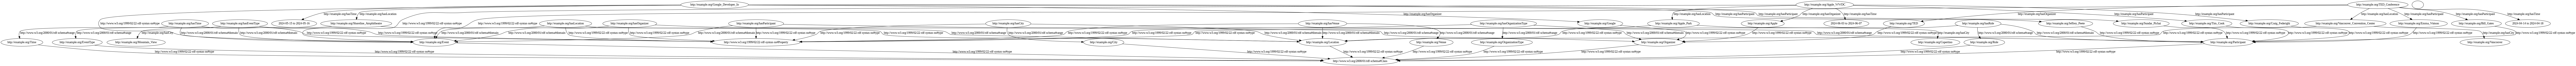

In [34]:
import io
import pydotplus
from rdflib import Graph
from IPython.display import Image, display

# Helper function for visualizing RDF graphs
def visualize(g):
    # RDF grafiğini manuel olarak DOT formatına dönüştür
    dot_data = "digraph G {\n"

    # Grafik üzerinde her bir triple'ı gez ve DOT formatında ekle
    for subj, pred, obj in g:
        dot_data += f'  "{subj}" -> "{obj}" [label="{pred}"];\n'

    dot_data += "}"

    # DOT verisini pydotplus ile yükle
    dg = pydotplus.graph_from_dot_data(dot_data)

    # PNG görselini oluştur
    png = dg.create_png()

    # Görseli IPython display ile göster
    display(Image(png))

# RDF verisini Turtle formatında tanımla
rdf_data = """
@prefix ex: <http://example.org/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

# Classes
ex:Event a rdfs:Class .
ex:Location a rdfs:Class .
ex:Time a rdfs:Class .
ex:Participant a rdfs:Class .
ex:Organizer a rdfs:Class .
ex:EventType a rdfs:Class .
ex:City a rdfs:Class .
ex:Venue a rdfs:Class .
ex:Role a rdfs:Class .
ex:OrganizationType a rdfs:Class .

# Properties
ex:hasLocation a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Location .

ex:hasTime a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Time .

ex:hasParticipant a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Participant .

ex:hasOrganizer a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Organizer .

ex:hasEventType a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:EventType .

ex:hasCity a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:City .

ex:hasVenue a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:Venue .

ex:hasRole a rdf:Property ;
    rdfs:domain ex:Participant ;
    rdfs:range ex:Role .

ex:hasOrganizationType a rdf:Property ;
    rdfs:domain ex:Organizer ;
    rdfs:range ex:OrganizationType .

# Instances
ex:Google_Developer_Io a ex:Event ;
    ex:hasLocation ex:Shoreline_Amphitheatre ;
    ex:hasTime "2024-05-15 to 2024-05-16"^^xsd:string ;
    ex:hasParticipant ex:Sundar_Pichai, ex:Jeffrey_Peete ;
    ex:hasOrganizer ex:Google .

ex:Apple_WWDC a ex:Event ;
    ex:hasLocation ex:Apple_Park ;
    ex:hasTime "2024-06-03 to 2024-06-07"^^xsd:string ;
    ex:hasParticipant ex:Tim_Cook, ex:Craig_Federighi ;
    ex:hasOrganizer ex:Apple .

ex:TED_Conference a ex:Event ;
    ex:hasLocation ex:Vancouver_Convention_Center ;
    ex:hasTime "2024-04-14 to 2024-04-18"^^xsd:string ;
    ex:hasParticipant ex:Bill_Gates, ex:Emma_Watson ;
    ex:hasOrganizer ex:TED .

ex:Shoreline_Amphitheatre a ex:Location ;
    ex:hasCity ex:Mountain_View .

ex:Apple_Park a ex:Location ;
    ex:hasCity ex:Cupertino .

ex:Vancouver_Convention_Center a ex:Location ;
    ex:hasCity ex:Vancouver .

ex:Sundar_Pichai a ex:Participant .
ex:Jeffrey_Peete a ex:Participant .
ex:Tim_Cook a ex:Participant .
ex:Craig_Federighi a ex:Participant .
ex:Bill_Gates a ex:Participant .
ex:Emma_Watson a ex:Participant .

ex:Google a ex:Organizer .
ex:Apple a ex:Organizer .
ex:TED a ex:Organizer .
"""

# RDF grafiğini oluştur
g = Graph()

# RDF verisini doğru formatta işleme
try:
    g.parse(data=rdf_data, format="turtle")
    print("RDF verisi başarıyla yüklendi.")
except Exception as e:
    print(f"RDF verisi yüklenirken hata oluştu: {e}")

# Görselleştir
visualize(g)


#linketen kurtumla denem 2

RDF verisi başarıyla yüklendi.


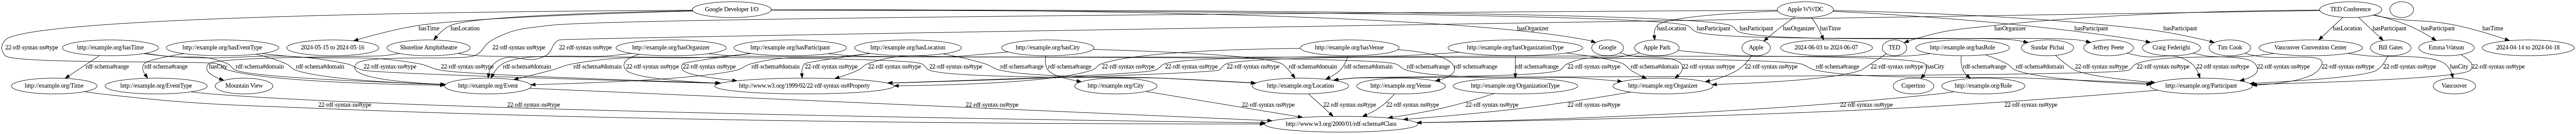

In [35]:
import io
import pydotplus
from rdflib import Graph
from IPython.display import Image, display

# Helper function for visualizing RDF graphs
def visualize(g):
    # RDF grafiğini manuel olarak DOT formatına dönüştür
    dot_data = "digraph G {\n"

    # Grafik üzerinde her bir triple'ı gez ve DOT formatında ekle
    for subj, pred, obj in g:
        # Bağlantı isimlerini daha anlamlı hale getirme
        pred_label = str(pred).split('/')[-1]  # Bağlantı adlarını sadeleştir
        dot_data += f'  "{subj}" -> "{obj}" [label="{pred_label}"];\n'

    dot_data += "}"

    # DOT verisini pydotplus ile yükle
    dg = pydotplus.graph_from_dot_data(dot_data)

    # PNG görselini oluştur
    png = dg.create_png()

    # Görseli IPython display ile göster
    display(Image(png))

# RDF verisini Turtle formatında tanımla
rdf_data = """
@prefix ex: <http://example.org/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

# Classes
ex:Event a rdfs:Class .
ex:Location a rdfs:Class .
ex:Time a rdfs:Class .
ex:Participant a rdfs:Class .
ex:Organizer a rdfs:Class .
ex:EventType a rdfs:Class .
ex:City a rdfs:Class .
ex:Venue a rdfs:Class .
ex:Role a rdfs:Class .
ex:OrganizationType a rdfs:Class .

# Properties
ex:hasLocation a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Location .

ex:hasTime a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Time .

ex:hasParticipant a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Participant .

ex:hasOrganizer a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Organizer .

ex:hasEventType a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:EventType .

ex:hasCity a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:City .

ex:hasVenue a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:Venue .

ex:hasRole a rdf:Property ;
    rdfs:domain ex:Participant ;
    rdfs:range ex:Role .

ex:hasOrganizationType a rdf:Property ;
    rdfs:domain ex:Organizer ;
    rdfs:range ex:OrganizationType .

# Instances
"Google Developer I/O" a ex:Event ;
    ex:hasLocation "Shoreline Amphitheatre" ;
    ex:hasTime "2024-05-15 to 2024-05-16"^^xsd:string ;
    ex:hasParticipant "Sundar Pichai", "Jeffrey Peete" ;
    ex:hasOrganizer "Google" .

"Apple WWDC" a ex:Event ;
    ex:hasLocation "Apple Park" ;
    ex:hasTime "2024-06-03 to 2024-06-07"^^xsd:string ;
    ex:hasParticipant "Tim Cook", "Craig Federighi" ;
    ex:hasOrganizer "Apple" .

"TED Conference" a ex:Event ;
    ex:hasLocation "Vancouver Convention Center" ;
    ex:hasTime "2024-04-14 to 2024-04-18"^^xsd:string ;
    ex:hasParticipant "Bill Gates", "Emma Watson" ;
    ex:hasOrganizer "TED" .

"Shoreline Amphitheatre" a ex:Location ;
    ex:hasCity "Mountain View" .

"Apple Park" a ex:Location ;
    ex:hasCity "Cupertino" .

"Vancouver Convention Center" a ex:Location ;
    ex:hasCity "Vancouver" .

"Sundar Pichai" a ex:Participant .
"Jeffrey Peete" a ex:Participant .
"Tim Cook" a ex:Participant .
"Craig Federighi" a ex:Participant .
"Bill Gates" a ex:Participant .
"Emma Watson" a ex:Participant .

"Google" a ex:Organizer .
"Apple" a ex:Organizer .
"TED" a ex:Organizer .
"""

# RDF grafiğini oluştur
g = Graph()

# RDF verisini doğru formatta işleme
try:
    g.parse(data=rdf_data, format="turtle")
    print("RDF verisi başarıyla yüklendi.")
except Exception as e:
    print(f"RDF verisi yüklenirken hata oluştu: {e}")

# Görselleştir
visualize(g)


# deneme 3 hocanın kodu örnek alınıyor

In [44]:
import rdflib
from rdflib.plugins.serializers.dot import DotSerializer

# DOT formatında seri hale getirme eklentisini kaydet
rdflib.plugin.register(DotSerializer, 'rdflib.serializer', 'rdflib.plugins.serializers.dot', 'DotSerializer')


ModuleNotFoundError: No module named 'rdflib.plugins.serializers.dot'

In [42]:
import rdflib
import pydotplus
from rdflib import Graph
from rdflib.namespace import RDF, RDFS
from IPython.display import display, Image
import io

def visualize_rdf_graph(rdf_data):
    # RDF verisini yükle
    g = Graph()
    try:
        g.parse(data=rdf_data, format="turtle")
        print("RDF verisi başarıyla yüklendi.")
    except Exception as e:
        print(f"RDF verisi yüklenirken hata oluştu: {e}")
        return

    # RDF grafını DOT formatına dönüştür
    dot_data = g.serialize(format='dot').decode('utf-8')

    # DOT verisini pydotplus ile işleyip PNG görselini oluştur
    graph = pydotplus.graph_from_dot_data(dot_data)
    png_data = graph.create_png()

    # Görseli görüntüle
    display(Image(png_data))

# RDF verinizi buraya ekleyin
rdf_data = """
@prefix ex: <http://example.org/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ex:John_Travolta rdf:type ex:Actor ;
    ex:portrays ex:Vincent_Vega .

ex:Pulp_Fiction rdf:type ex:Film ;
    ex:hasActor ex:John_Travolta ;
    ex:hasActor ex:Uma_Thurman ;
    ex:hasActor ex:Bruce_Willis .
"""
visualize_rdf_graph(rdf_data)


RDF verisi başarıyla yüklendi.


PluginException: No plugin registered for (dot, <class 'rdflib.serializer.Serializer'>)

In [39]:
import rdflib
from rdflib.plugins.serializers.dot import DotSerializer

# DOT formatında seri hale getirme eklentisini kaydet
rdflib.plugin.register(DotSerializer, 'rdflib.serializer', 'rdflib.plugins.serializers.dot', 'DotSerializer')


ModuleNotFoundError: No module named 'rdflib.plugins.serializers.dot'

In [43]:
import rdflib
import pydotplus
from rdflib import Graph
from rdflib.namespace import RDF, RDFS
from IPython.display import display, Image

def visualize_rdf_graph(rdf_data):
    # RDF verisini yükle
    g = Graph()
    try:
        g.parse(data=rdf_data, format="turtle")
        print("RDF verisi başarıyla yüklendi.")
    except Exception as e:
        print(f"RDF verisi yüklenirken hata oluştu: {e}")
        return

    # RDF grafını DOT formatına dönüştür
    dot_data = g.serialize(format='dot').decode('utf-8')

    # DOT verisini pydotplus ile işleyip PNG görselini oluştur
    graph = pydotplus.graph_from_dot_data(dot_data)
    png_data = graph.create_png()

    # Görseli görüntüle
    display(Image(png_data))

# RDF verinizi buraya ekleyin
rdf_data = """
@prefix ex: <http://example.org/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ex:John_Travolta rdf:type ex:Actor ;
    ex:portrays ex:Vincent_Vega .

ex:Pulp_Fiction rdf:type ex:Film ;
    ex:hasActor ex:John_Travolta ;
    ex:hasActor ex:Uma_Thurman ;
    ex:hasActor ex:Bruce_Willis .
"""
visualize_rdf_graph(rdf_data)


RDF verisi başarıyla yüklendi.


PluginException: No plugin registered for (dot, <class 'rdflib.serializer.Serializer'>)

In [49]:
import rdflib
import pydotplus
from rdflib import Graph
from rdflib.namespace import RDF, RDFS
from IPython.display import display, Image
import io

def visualize_rdf_graph(rdf_data):
    # RDF verisini yükle
    g = Graph()
    try:
        g.parse(data=rdf_data, format="turtle")
        print("RDF verisi başarıyla yüklendi.")
    except Exception as e:
        print(f"RDF verisi yüklenirken hata oluştu: {e}")
        return

    # RDF grafını DOT formatına dönüştür
    dot_data = g.serialize(format='dot').decode('utf-8')

    # DOT verisini pydotplus ile işleyip PNG görselini oluştur
    graph = pydotplus.graph_from_dot_data(dot_data)
    png_data = graph.create_png()

    # Görseli görüntüle
    display(Image(png_data))

# RDF verinizi buraya ekleyin
rdf_data = """
@prefix ex: <http://example.org/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ex:John_Travolta rdf:type ex:Actor ;
    ex:portrays ex:Vincent_Vega .

ex:Pulp_Fiction rdf:type ex:Film ;
    ex:hasActor ex:John_Travolta ;
    ex:hasActor ex:Uma_Thurman ;
    ex:hasActor ex:Bruce_Willis .
"""
visualize_rdf_graph(rdf_data)


RDF verisi başarıyla yüklendi.


PluginException: No plugin registered for (dot, <class 'rdflib.serializer.Serializer'>)

In [50]:
import networkx as nx
from pyvis.network import Network

# Define nodes and edges
complex_nodes = {
    "AI Conference": (0, 0), "Blockchain Summit": (-4, 2), "Music Festival": (4, 2),
    "Tech Center": (-2, -2), "Concert Hall": (2, -2), "Innovation Hub": (-6, 0),
    "New York": (-3, -3), "Los Angeles": (3, -3), "San Francisco": (-7, -1),
    "John Doe": (-4, 0), "Jane Smith": (-2, 1), "Alice Brown": (4, 0),
    "Tech Events Inc.": (-6, -2), "Music Mania Org.": (6, -2),
    "2024-12-01 to 2024-12-03": (0, -1), "2025-01-10 to 2025-01-12": (-4, -1),
    "2025-02-15 to 2025-02-16": (4, -1)
}

complex_edges = [
    ("AI Conference", "Tech Center"), ("Blockchain Summit", "Innovation Hub"), ("Music Festival", "Concert Hall"),
    ("Tech Center", "New York"), ("Concert Hall", "Los Angeles"), ("Innovation Hub", "San Francisco"),
    ("AI Conference", "John Doe"), ("AI Conference", "Jane Smith"), ("Music Festival", "Alice Brown"),
    ("Blockchain Summit", "John Doe"), ("Blockchain Summit", "Alice Brown"),
    ("AI Conference", "Tech Events Inc."), ("Blockchain Summit", "Tech Events Inc."),
    ("Music Festival", "Music Mania Org."),
    ("AI Conference", "2024-12-01 to 2024-12-03"),
    ("Blockchain Summit", "2025-01-10 to 2025-01-12"),
    ("Music Festival", "2025-02-15 to 2025-02-16")
]

# Create a directed graph for the complex ontology
G_complex = nx.DiGraph()
G_complex.add_nodes_from(complex_nodes.keys())
G_complex.add_edges_from(complex_edges)

# Create a pyvis network for visualization
pyvis_net = Network(notebook=True)

# Define the styles for nodes based on prefixes
VIS_STYLE = {
    "dbr": {
        "color": "orange",
        "size": 20,
    },
    "dbo": {
        "color": "blue",
        "size": 25,
    },
}

# Add nodes to pyvis network with styles
for node, position in complex_nodes.items():
    node_type = "dbr" if "Event" in node or "Org" in node else "dbo"  # Example classification
    pyvis_net.add_node(node, x=position[0], y=position[1], title=node, color=VIS_STYLE[node_type]["color"], size=VIS_STYLE[node_type]["size"])

# Add edges to pyvis network
for edge in complex_edges:
    pyvis_net.add_edge(edge[0], edge[1])

# Use ForceAtlas2 for layout and display in the notebook
pyvis_net.force_atlas_2based()
pyvis_net.show("complex_ontology_visualization.html")

# To display the graph, download the html and open it in the browser of your choice.
from google.colab import files
files.download('complex_ontology_visualization.html')


complex_ontology_visualization.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>